In [71]:
import pandas as pd
import plotly.graph_objects as go
import os
import cv2
from mediapipe.python.solutions import pose as mp_pose
import mediapipe as mp
import plotly.express as px
import matplotlib.pyplot as plt

_PRESENCE_THRESHOLD = 0.5
_VISIBILITY_THRESHOLD = 0.5


def plot_landmarks(
    landmark_list,
    connections=None,
):
    if not landmark_list:
        return
    plotted_landmarks = {}
    for idx, landmark in enumerate(landmark_list.landmark):
        if (
            landmark.HasField("visibility")
            and landmark.visibility < _VISIBILITY_THRESHOLD
        ) or (
            landmark.HasField("presence") and landmark.presence < _PRESENCE_THRESHOLD
        ):
            continue
        plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        out_cn = []
        num_landmarks = len(landmark_list.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(
                    f"Landmark index is out of range. Invalid connection "
                    f"from landmark #{start_idx} to landmark #{end_idx}."
                )
            if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
                landmark_pair = [
                    plotted_landmarks[start_idx],
                    plotted_landmarks[end_idx],
                ]
                out_cn.append(
                    dict(
                        xs=[landmark_pair[0][0], landmark_pair[1][0]],
                        ys=[landmark_pair[0][1], landmark_pair[1][1]],
                        zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    )
                )
        cn2 = {"xs": [], "ys": [], "zs": []}
        for pair in out_cn:
            for k in pair.keys():
                cn2[k].append(pair[k][0])
                cn2[k].append(pair[k][1])
                cn2[k].append(None)

    df = pd.DataFrame(plotted_landmarks).T.rename(columns={0: "z", 1: "x", 2: "y"})
    df["lm"] = df.index.map(lambda s: mp_pose.PoseLandmark(s).name).values
    fig = (
        px.scatter_3d(df, x="z", y="x", z="y", hover_name="lm")
        .update_traces(marker={"color": "red"})
        .update_layout(
            margin={"l": 0, "r": 0, "t": 0, "b": 0},
            scene={"camera": {"eye": {"x": 2.1, "y": 0, "z": 0}}},
        )
    )
    fig.add_traces(
        [
            go.Scatter3d(
                x=cn2["xs"],
                y=cn2["ys"],
                z=cn2["zs"],
                mode="lines",
                line={"color": "black", "width": 5},
                name="connections",
            )
        ]
    )

    return fig

In [72]:
path = 'C://python//train//fall/video1/fall-01-cam0-rgb-001.png'
# a = os.listdir(path)

In [73]:
#find filename in a


In [74]:
img = cv2.imread(path, cv2.IMREAD_COLOR)

In [75]:
pose = mp_pose.Pose()
mpDraw = mp.solutions.drawing_utils

In [76]:
pose.reset()

In [77]:
result = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [78]:
def getPoint(name):
    if name.lower() == 'neck':
        return round(0.5* (getPoint('RIGHT_SHOULDER') + getPoint('LEFT_SHOULDER')), 10)
    return result.pose_world_landmarks.landmark[mp_pose.PoseLandmark._member_map_[name]].y

In [79]:
getPoint('neck')

-0.4779525399

In [80]:
getPoint('RIGHT_SHOULDER')

-0.4724985659122467

In [81]:
getPoint('RIGHT_ANKLE')

0.6859170794487

In [82]:
getPoint('LEFT_ANKLE')

0.6581276059150696

In [83]:
getPoint('LEFT_SHOULDER')

-0.48340651392936707

In [84]:

plot_landmarks(
        result.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)

In [93]:
nose = []
nose.append(result.pose_world_landmarks[mp_pose.PoseLandmark.NOSE].x)

TypeError: 'LandmarkList' object is not subscriptable

In [ ]:
result.pose_world_landmarks[mp_pose.PoseLandmark.NOSE].x
result.pose_world_landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x, result.pose_world_landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y


TypeError: 'LandmarkList' object is not subscriptable

In [98]:
nose = [result.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x, result.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y]
foot = [result.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x, result.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y]

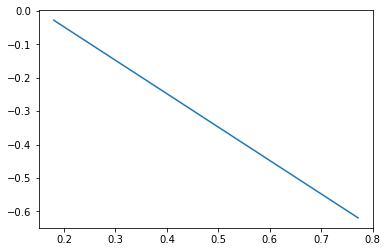

In [100]:
plt.plot(foot, nose)

In [101]:
x_values = [nose[0], foot[0]]
y_values = [nose[1], foot[1]]

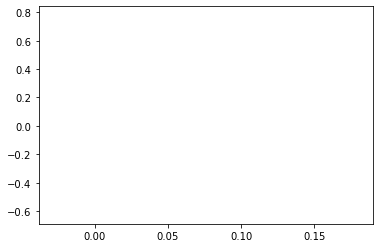

In [105]:
plt.plot(nose[0], nose[1])
plt.plot(foot[0], foot[1])

In [106]:
x_nose = [nose[0]]
y_nose = [nose[1]]
x_foot = [foot[0]]
y_foot = [foot[1]]

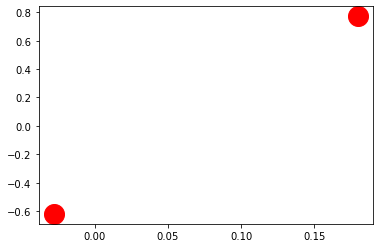

In [110]:
plt.plot(x_nose, y_nose, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")
plt.plot(x_foot, y_foot, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")